<a href="https://colab.research.google.com/github/December04/MachineLearningProgramming/blob/main/Week05/Assignment01-ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
digits = datasets.load_digits()
X = digits.images
y = digits.target

In [3]:
X_flat = X.reshape((X.shape[0], -1)).astype(float)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [6]:
dt = DecisionTreeClassifier(random_state=42)
lr = LogisticRegression(max_iter=2000, multi_class='multinomial', solver='saga', random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)

In [7]:
dt.fit(X_train, y_train)
lr.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


RandomForestClassifier(n_estimators=200, random_state=42)

In [8]:
y_pred_dt = dt.predict(X_test)
y_pred_lr = lr.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)

In [13]:
def evaluate(name, y_true, y_pred):
    print(f"\n--- {name} ---")
    print("Accuracy:", metrics.accuracy_score(y_true, y_pred))
    print("Classification report:")
    print(metrics.classification_report(y_true, y_pred, digits=3))
    cm = metrics.confusion_matrix(y_true, y_pred)
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=digits.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion matrix ({name})")
    plt.show()


--- Decision Tree ---
Accuracy: 0.825
Classification report:
              precision    recall  f1-score   support

           0      0.921     0.972     0.946        36
           1      0.839     0.722     0.776        36
           2      0.778     0.800     0.789        35
           3      0.789     0.811     0.800        37
           4      0.861     0.861     0.861        36
           5      0.875     0.946     0.909        37
           6      0.811     0.833     0.822        36
           7      0.838     0.861     0.849        36
           8      0.706     0.686     0.696        35
           9      0.818     0.750     0.783        36

    accuracy                          0.825       360
   macro avg      0.824     0.824     0.823       360
weighted avg      0.824     0.825     0.824       360



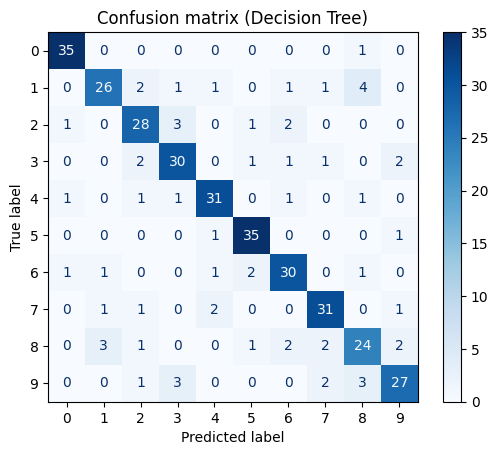


--- Logistic Regression ---
Accuracy: 0.9722222222222222
Classification report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        36
           1      0.889     0.889     0.889        36
           2      1.000     1.000     1.000        35
           3      0.974     1.000     0.987        37
           4      0.973     1.000     0.986        36
           5      1.000     1.000     1.000        37
           6      1.000     0.972     0.986        36
           7      1.000     1.000     1.000        36
           8      0.886     0.886     0.886        35
           9      1.000     0.972     0.986        36

    accuracy                          0.972       360
   macro avg      0.972     0.972     0.972       360
weighted avg      0.972     0.972     0.972       360



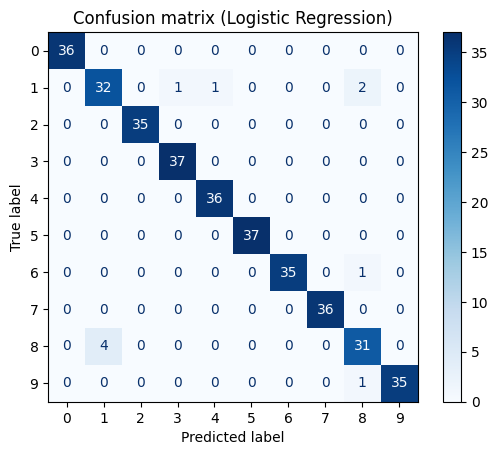


--- Random Forest ---
Accuracy: 0.9638888888888889
Classification report:
              precision    recall  f1-score   support

           0      0.972     0.972     0.972        36
           1      0.921     0.972     0.946        36
           2      1.000     0.971     0.986        35
           3      0.973     0.973     0.973        37
           4      0.973     1.000     0.986        36
           5      0.974     1.000     0.987        37
           6      1.000     0.972     0.986        36
           7      0.923     1.000     0.960        36
           8      0.938     0.857     0.896        35
           9      0.971     0.917     0.943        36

    accuracy                          0.964       360
   macro avg      0.964     0.963     0.963       360
weighted avg      0.964     0.964     0.964       360



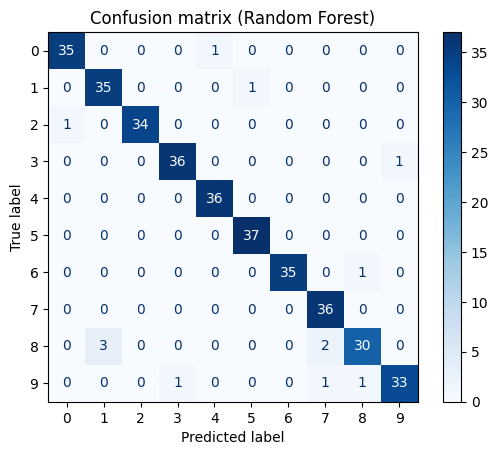

In [14]:
evaluate("Decision Tree", y_test, y_pred_dt)
evaluate("Logistic Regression", y_test, y_pred_lr)
evaluate("Random Forest", y_test, y_pred_rf)